Range of selling prices: 5000 - 760000
Median selling price: 45000.0
Most common seller type: Individual
Number of bikes driven more than 50,000 km: 170
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
Proportion of bikes from 2015 or older: 56.64%
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Highest ex-showroom price: 1278000.0 for Harley-Davidson Street Bob
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


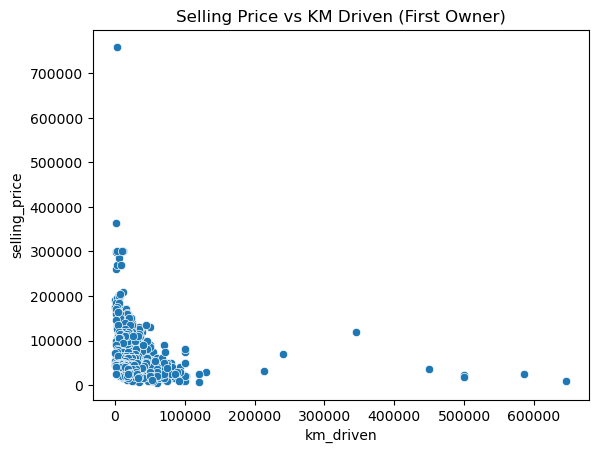

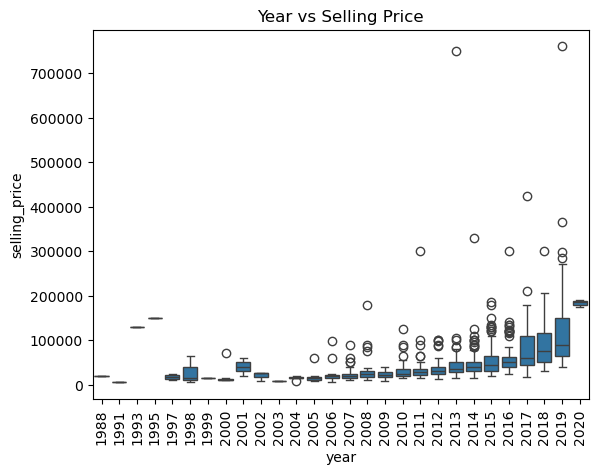

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...             

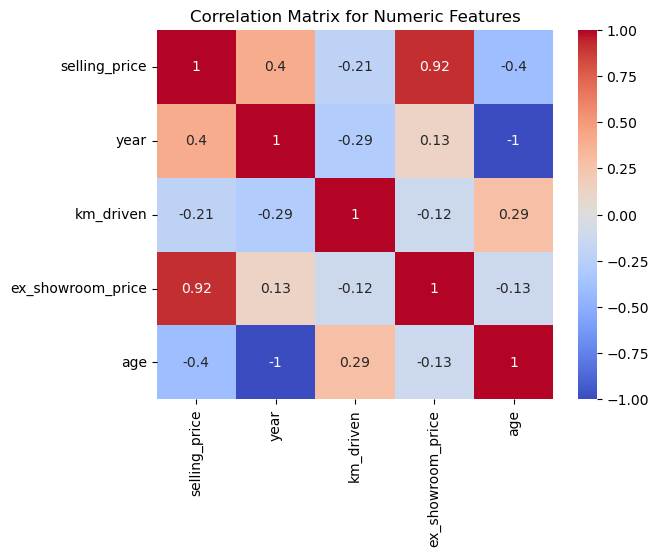

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
bike_df = pd.read_csv("BIKE DETAILS.csv")  # Update the file path

# 1. What is the range of selling prices in the dataset?
print(f"Range of selling prices: {bike_df['selling_price'].min()} - {bike_df['selling_price'].max()}")

# 2. What is the median selling price for bikes in the dataset?
print(f"Median selling price: {bike_df['selling_price'].median()}")

# 3. What is the most common seller type?
print(f"Most common seller type: {bike_df['seller_type'].mode()[0]}")

# 4. How many bikes have driven more than 50,000 kilometers?
print(f"Number of bikes driven more than 50,000 km: {(bike_df['km_driven'] > 50000).sum()}")

# 5. What is the average km_driven value for each ownership type?
print(bike_df.groupby('owner')['km_driven'].mean())

# 6. What proportion of bikes are from the year 2015 or older?
older_bikes = (bike_df['year'] <= 2015).sum() / len(bike_df) * 100
print(f"Proportion of bikes from 2015 or older: {older_bikes:.2f}%")

# 7. What is the trend of missing values across the dataset?
print(bike_df.isnull().sum())

# 8. What is the highest ex_showroom_price recorded, and for which bike?
max_price_bike = bike_df.loc[bike_df['ex_showroom_price'].idxmax()]
print(f"Highest ex-showroom price: {max_price_bike['ex_showroom_price']} for {max_price_bike['name']}")

# 9. What is the total number of bikes listed by each seller type?
print(bike_df['seller_type'].value_counts())

# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(data=bike_df[bike_df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven (First Owner)")
plt.show()

# 11. Identify and remove outliers in the km_driven column using the IQR method
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
bike_df_cleaned = bike_df[~((bike_df['km_driven'] < (Q1 - 1.5 * IQR)) | (bike_df['km_driven'] > (Q3 + 1.5 * IQR)))]

# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price
sns.boxplot(x=bike_df['year'], y=bike_df['selling_price'])
plt.title("Year vs Selling Price")
plt.xticks(rotation=90)
plt.show()

# 13. What is the average depreciation in selling price based on the bike's age?
current_year = 2025  # Update the current year
bike_df['age'] = current_year - bike_df['year']
print(bike_df.groupby('age')['selling_price'].mean())

# 14. Which bike names are priced significantly above the average price for their manufacturing year?
year_avg_price = bike_df.groupby('year')['selling_price'].mean()
bike_df_above_avg = bike_df[bike_df['selling_price'] > bike_df['year'].map(year_avg_price)]
print(bike_df_above_avg[['name', 'year', 'selling_price']])

# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = bike_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = bike_df[numeric_columns].corr()

# Plot the heatmap with the corrected numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numeric Features")
plt.show()


Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

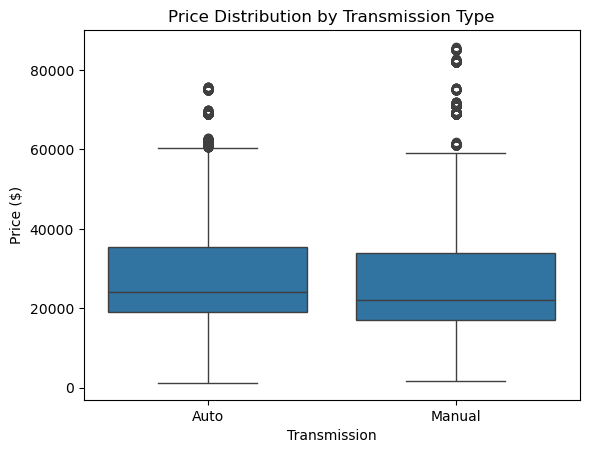

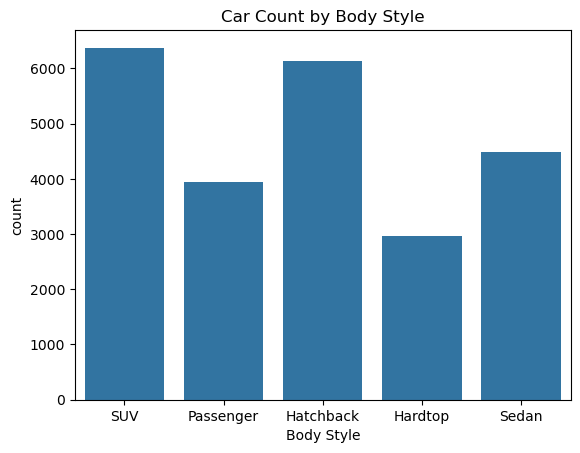

Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [23]:
car_df = pd.read_csv("Car Sale.csv")  # Update the file path

# 1. What is the average selling price of cars for each dealer?
print(car_df.groupby('Dealer_Name')['Price ($)'].mean())

# 2. Which car brand (Company) has the highest variation in prices?
print(car_df.groupby('Company')['Price ($)'].std().idxmax())

# 3. What is the distribution of car prices for each transmission type?
sns.boxplot(x='Transmission', y='Price ($)', data=car_df)
plt.title("Price Distribution by Transmission Type")
plt.show()

# 4. What is the distribution of cars based on body styles?
sns.countplot(x='Body Style', data=car_df)
plt.title("Car Count by Body Style")
plt.show()

# 5. How does the average selling price of cars vary by customer gender?
print(car_df.groupby('Gender')['Price ($)'].mean())

# 6. What are the top 5 car models with the highest number of sales?
top_models = car_df['Model'].value_counts().head(5)
print(top_models)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

/var/folders/sm/m34mzjsd2wx8hl85lrx3gqqm0000gn/T/ipykernel_27587/1335308138.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(amazon_df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count')))


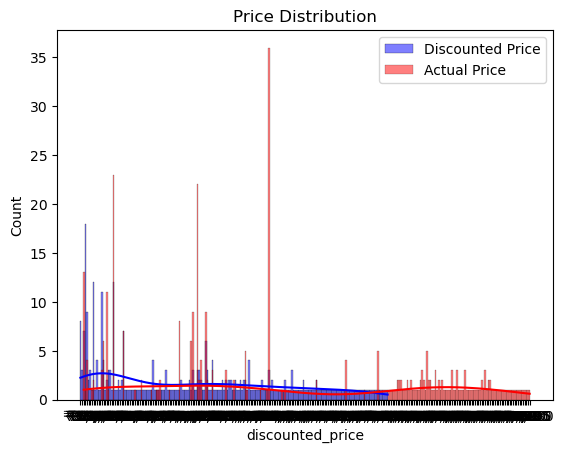

                  discounted_price   rating
discounted_price           1.00000  0.08152
rating                     0.08152  1.00000
category
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice           5.00
Electronics|Mobiles&Accessories|MobileAccessories|Photo&VideoAccessories|SelfieSticks    4.60
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                             4.50
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers    4.45
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                      4.40
Name: rating, dtype: float64


In [31]:
import pandas as pd

# Load the dataset
amazon_df = pd.read_csv("amazon.csv")  # Update the file path

# Convert 'rating' column to numeric, forcing errors to NaN for cleanup
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Check for NaN values introduced during conversion
if amazon_df['rating'].isnull().sum() > 0:
    print("Warning: Non-numeric values found and converted to NaN in 'rating' column.")
    amazon_df.dropna(subset=['rating'], inplace=True)  # Remove rows with NaN ratings

# 1. What is the average rating for each product category?
print(amazon_df.groupby('category')['rating'].mean())

# 2. What are the top rating_count products by category?
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce')

# Remove any rows where rating_count couldn't be converted (NaN values)
amazon_df.dropna(subset=['rating_count'], inplace=True)

# Ensure rating_count is integer
amazon_df['rating_count'] = amazon_df['rating_count'].astype(int)
print(amazon_df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count')))

# 3. What is the distribution of discounted prices vs. actual prices?
sns.histplot(data=amazon_df, x='discounted_price', label="Discounted Price", kde=True, color='blue')
sns.histplot(data=amazon_df, x='actual_price', label="Actual Price", kde=True, color='red')
plt.legend()
plt.title("Price Distribution")
plt.show()

# 4. What is the correlation between discounted_price and rating?
amazon_df['discounted_price'] = amazon_df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)

amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

amazon_df.dropna(subset=['discounted_price', 'rating'], inplace=True)
print(amazon_df[['discounted_price', 'rating']].corr())

# 5. What are the Top 5 categories based on the highest ratings?
top_categories = amazon_df.groupby('category')['rating'].mean().nlargest(5)
print(top_categories)


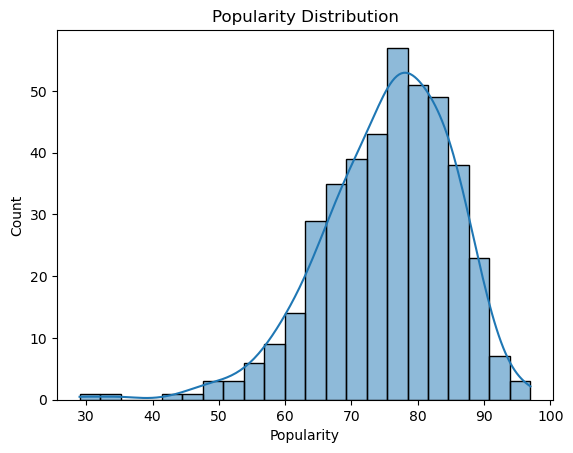

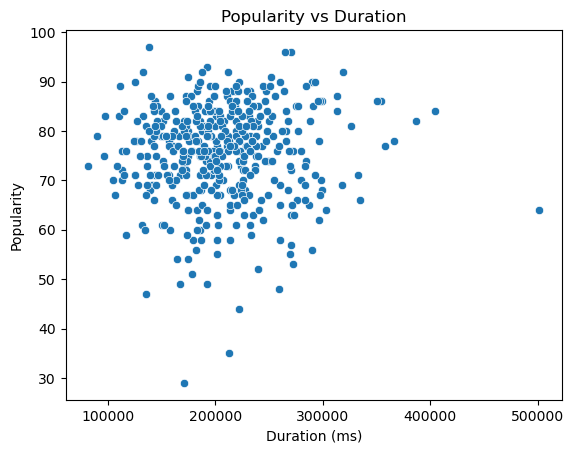

Artist
Drake    17
Name: count, dtype: int64
             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [33]:
spotify_df = pd.read_csv("spotify.csv") 

# 1. Read the dataframe, check null values and duplicates
spotify_df.dropna(inplace=True)
spotify_df.drop_duplicates(inplace=True)

# 2. What is the distribution of popularity among the tracks?
sns.histplot(spotify_df['Popularity'], kde=True)
plt.title("Popularity Distribution")
plt.show()

# 3. Is there any relationship between popularity and duration of tracks?
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_df)
plt.title("Popularity vs Duration")
plt.show()

# 4. Which artist has the highest number of tracks?
print(spotify_df['Artist'].value_counts().head(1))

# 5. What are the top 5 least popular tracks?
print(spotify_df.nsmallest(5, 'Popularity')[['Artist', 'Track Name']])

# 6. Among the top 5 most popular artists, which has the highest average popularity?
top_artists_avg = spotify_df.groupby('Artist')['Popularity'].mean().nlargest(5)
print(top_artists_avg)
